In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../../utils/')
import lec12_graphs as gfx
plt.style.use('ggplot')

In [2]:
vec = np.array([1,2])
print('Tensor 1: {0}'.format(vec))
print('La dimension de este vector/tensor es: {0}'.format(vec.ndim))
print('Sin embargo contiene {0} valores.'.format(vec.size))

Tensor 1: [1 2]
La dimension de este vector/tensor es: 1
Sin embargo contiene 2 valores.


In [3]:
vec_2 = np.array([[1],[2],[3],[4],[5],[6],[7],[8]])
print('Tensor 2: \n{0}'.format(vec_2))
print('La dimension de este vector/tensor es: {0}'.format(vec_2.ndim))
print('Sin embargo contiene {0} valores.'.format(vec_2.size))

Tensor 2: 
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]
La dimension de este vector/tensor es: 2
Sin embargo contiene 8 valores.


In [4]:
print('Tensor: \n{0}'.format(vec_2))
print('Shape: {0}'.format(vec_2.shape))
print('Rango: {0}'.format(vec_2.ndim))
print('Tipo de dato que almacena: {0}'.format(vec_2.dtype))

Tensor: 
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]
Shape: (8, 1)
Rango: 2
Tipo de dato que almacena: int32


In [8]:
#from scipy import misc
#from imageio import imread
# importamos la imagen y la mostramos
#hubble = imread('../../data/img/hubbledeepfield.png')

In [9]:
vec_a = np.array([1,2,3,4])
vec_b = np.array([6,7,8,9])
print('Vector a: \n{0}'.format(vec_a))
print('Vector b: \n{0}'.format(vec_b))
print('Matriz: \n {0}'.format(vec_a.reshape(2,2)))

Vector a: 
[1 2 3 4]
Vector b: 
[6 7 8 9]
Matriz: 
 [[1 2]
 [3 4]]


In [11]:
# Operación element-wise
print('Suma')
print('Operación element-wise: {1} + {2} = {0}'.format(vec_a+vec_b,vec_a,vec_b))

Suma
Operación element-wise: [1 2 3 4] + [6 7 8 9] = [ 7  9 11 13]


In [12]:
# Operación tensor-wise
print('Producto punto')
print('Operación tensor-wise: {1} * {2} = {0}'.format(np.dot(vec_a, vec_b),vec_a,vec_b))

Producto punto
Operación tensor-wise: [1 2 3 4] * [6 7 8 9] = 80


In [13]:
from numpy import tensordot
# Operación tensor-wise
print('Producto matricial')
tensorwise = np.tensordot(vec_b, vec_a, axes = 0)
print('Operación tensor-wise con la matriz: vec_b (x) vec_a = \n{0}'.format(tensorwise))

Producto matricial
Operación tensor-wise con la matriz: vec_b (x) vec_a = 
[[ 6 12 18 24]
 [ 7 14 21 28]
 [ 8 16 24 32]
 [ 9 18 27 36]]


In [14]:
import tensorflow as tf
import keras

In [15]:
keras.backend.backend()

'tensorflow'

In [16]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

print('Utilizando {0} como backend para Keras.'.format(keras.backend.backend()))

Utilizando tensorflow como backend para Keras.


In [17]:
model = Sequential()

In [18]:
# capa de entrada
model.add(Dense(1, activation = 'linear',
                use_bias = False,
                kernel_initializer='uniform',
                input_shape = [1],
                name="entrada"))
model.add(Dense(activation='linear',
                input_dim=1,
                use_bias=False,
                name="salida",
                units=1))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 entrada (Dense)             (None, 1)                 1         
                                                                 
 salida (Dense)              (None, 1)                 1         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [20]:
from keras.optimizers import SGD
model.compile(optimizer = SGD(lr = 0.1), loss='mse')

In [22]:
m = 30; 
intercept_true = 0.5; 
slope_true = 1.5

x = slope_true + np.random.randn(m, 1)
y = intercept_true + (slope_true * x) + np.random.rand(m, 1)

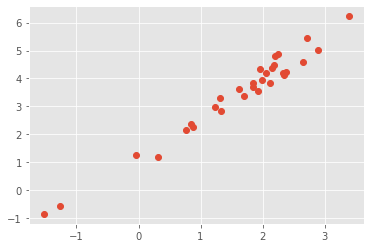

In [23]:
plt.plot(x, y, 'o')

In [24]:
model.fit(x, y, epochs = 50, verbose = 0)

In [25]:
model.get_weights()

[array([[0.45229566]], dtype=float32), array([[0.45229566]], dtype=float32)]

In [26]:
model.predict([2.5])

1/1 [==============================] - 0s 227ms/step


array([[0.5114284]], dtype=float32)

In [27]:
X_train, y_train, X_test, y_test = gfx.circles()

In [28]:
for i in [X_train, y_train, X_test, y_test]:
    print(i.shape)

(1000, 2)
(1000,)
(1000, 2)
(1000,)


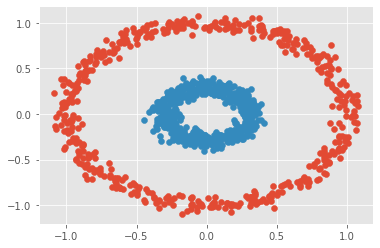

In [29]:
for i in np.unique(y_test):
    subset = X_test[y_test==i]
    plt.scatter(subset[:,0], subset[:, 1])

In [30]:
model = Sequential()
model.add(Dense(1, input_dim = X_train.shape[1], kernel_initializer = "uniform", activation = "relu", name='in'))

model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid", name='out'))

model.compile(optimizer = SGD(lr = 1), loss = "binary_crossentropy", metrics = ["accuracy"])

model.fit(X_train, y_train, epochs = 50, batch_size = 100, verbose = 0)

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 in (Dense)                  (None, 1)                 3         
                                                                 
 out (Dense)                 (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [32]:
# guardaremos la información existente de la capa de entrada
capa_entrada = model.get_layer('in')
capa_entrada.get_weights()

[array([[-1.3198519],
        [-3.7688773]], dtype=float32),
 array([-1.3554198], dtype=float32)]

32/32 [==============================] - 0s 3ms/step - loss: 0.5464 - accuracy: 0.6950
Accuracy: 0.695000                                          
1250/1250 [==============================] - 3s 2ms/step


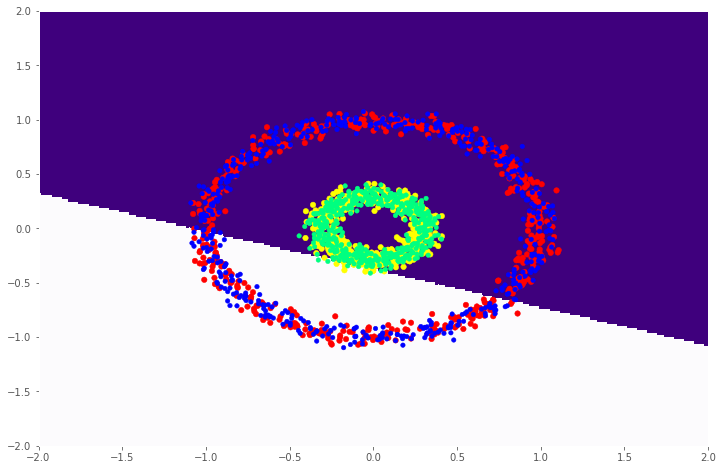

0.6949999928474426

In [33]:
gfx.evaluate_network(model, X_train, y_train, X_test, y_test)

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
support_vector_classifier = SVC(kernel='rbf').fit(X_train, y_train)
print("Capacidad predictiva en el testing set: ", accuracy_score(y_test,
support_vector_classifier.predict(X_test)))

Capacidad predictiva en el testing set:  1.0
